# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [23]:
pip install citipy


Note: you may need to restart the kernel to use updated packages.


In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude

from citipy import citipy 



### Generate the Cities List by Using the `citipy` Library

In [25]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [26]:
# Set the API base URL
url = "https://openweathermap.org/api"
units = "imperial"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get("https://openweathermap.org/api")

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | brokopondo
City not found. Skipping...
Processing Record 2 of Set 1 | adamstown
City not found. Skipping...
Processing Record 3 of Set 1 | hermanus
City not found. Skipping...
Processing Record 4 of Set 1 | flying fish cove
City not found. Skipping...
Processing Record 5 of Set 1 | port-aux-francais
City not found. Skipping...
Processing Record 6 of Set 1 | aykhal
City not found. Skipping...
Processing Record 7 of Set 1 | kalaleh
City not found. Skipping...
Processing Record 8 of Set 1 | selfoss
City not found. Skipping...
Processing Record 9 of Set 1 | lebu
City not found. Skipping...
Processing Record 10 of Set 1 | ancud
City not found. Skipping...
Processing Record 11 of Set 1 | puerto natales
City not found. Skipping...
Processing Record 12 of Set 1 | ilulissat
City not found. Skipping...
Processing Record 13 of Set 1 | robore
City not found. Skipping...
Processing Record 14 of Set 1 | bethel

In [32]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.read_csv("../output_data/cities.csv")


# Show Record Count
city_data_df.count()

City_ID       577
City_ID.1     577
City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       574
Date          577
dtype: int64

In [33]:
# Display sample data
city_data_df.head()

,City_ID,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [34]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [35]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City_ID.2,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,,
0,0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

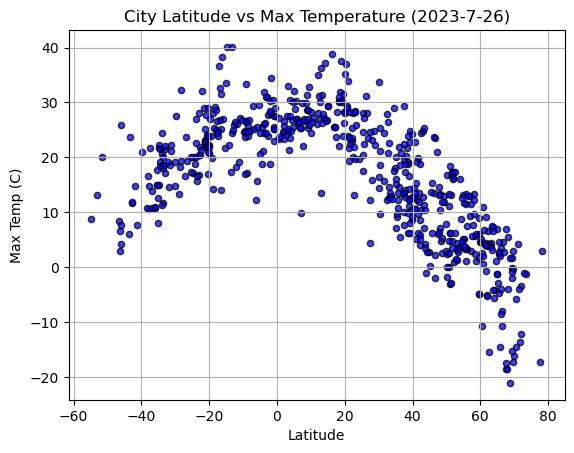

In [38]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)


# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature (2023-7-26)")
plt.ylabel("Max Temp (C)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

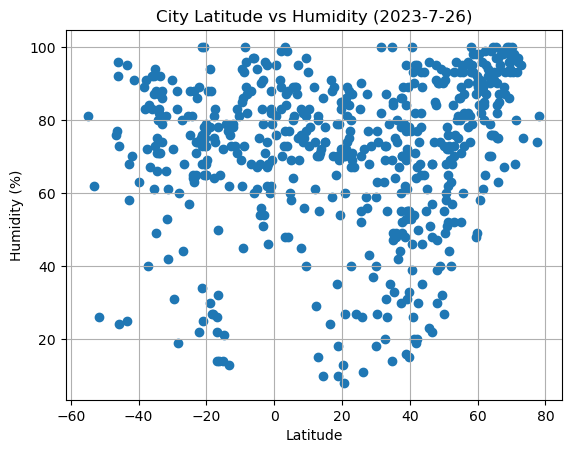

In [39]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity (2023-7-26)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

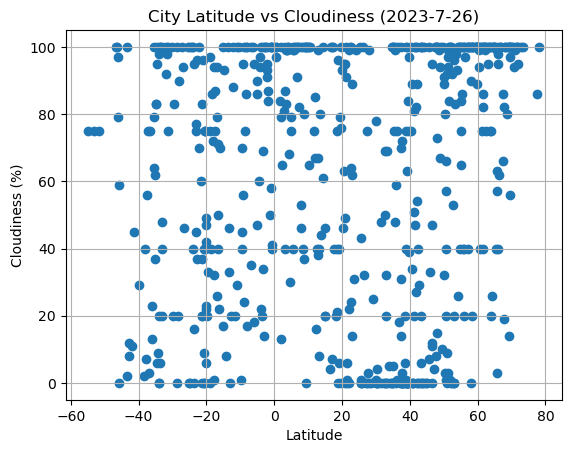

In [40]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])


# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness (2023-7-26)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

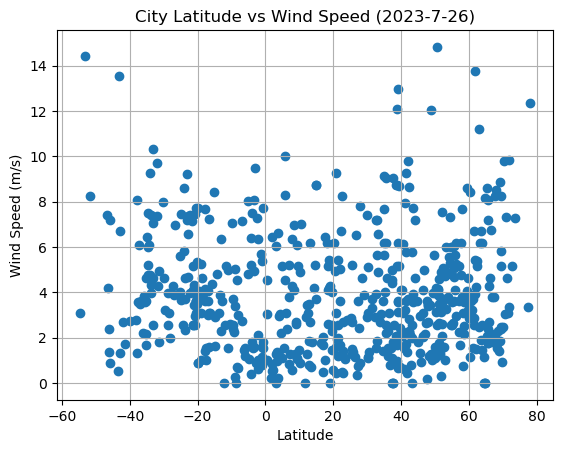

In [41]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])


# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed (2023-7-26)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [42]:
# Define a function to create Linear Regression plots
def lin_reg(x,y):
    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    
    #Print r value
    print("The r-value is: " + str(rvalue))
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Plot scatter plot
    plt.scatter(x, y)
    
    # Plot regression line
    plt.plot(x, regress_values, "r-")
    
    return line_eq


In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City_ID.2,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,,
0,0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,6,6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City_ID.2,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,,
2,2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,5,5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,7,7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,9,9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,10,10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8462548186825364


Text(0, 0.5, 'Max Temp')

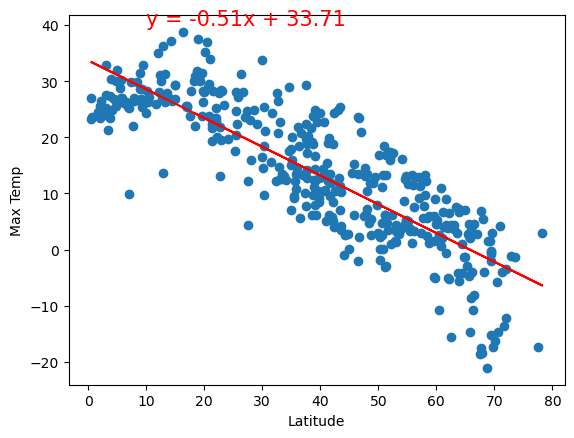

In [45]:
# Linear regression on Northern Hemisphere
line_eq = lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

plt.annotate(line_eq, (10,40), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

The r-value is: 0.6419546065421801


Text(0, 0.5, 'Max Temp')

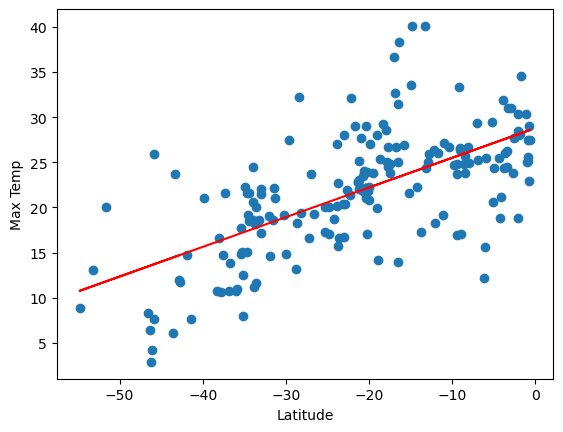

In [46]:
# Linear regression on Southern Hemisphere
line_eq = lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

plt.annotate(line_eq, (-50, 80), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")


**Discussion about the linear relationship:** In the northern hemisphere, increasing latitude leads to decreasing maximum temperatures. In the southern hemisphere, increasing latitude towards 0 leads to increasing maximum temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2385317912939407


Text(0, 0.5, 'Humidity')

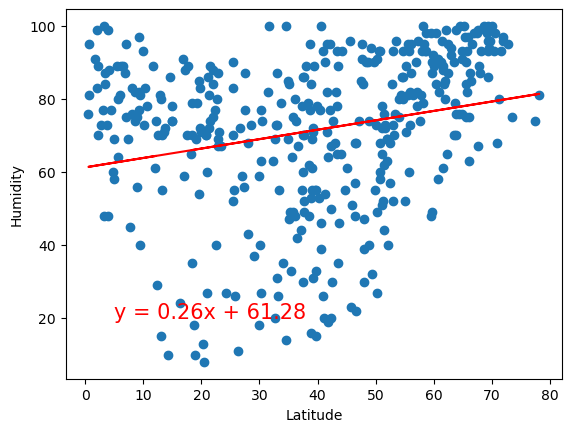

In [47]:
# Northern Hemisphere
line_eq = lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

plt.annotate(line_eq, (5, 20), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

The r-value is: 0.016759316950056818


Text(0, 0.5, 'Humidity')

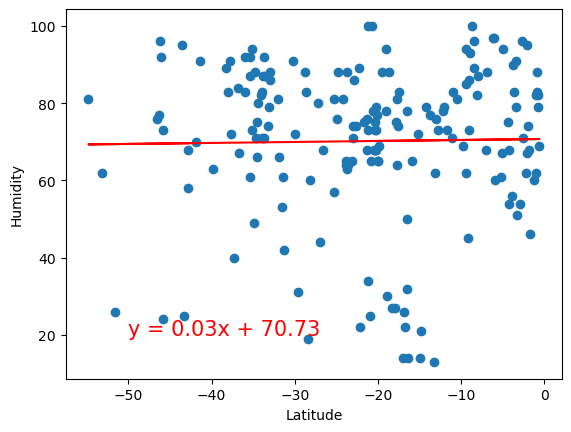

In [48]:
# Southern Hemisphere
line_eq = lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

plt.annotate(line_eq, (-50, 20), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")


**Discussion about the linear relationship:** The relationship between humidity and latitude differs between the northern and southern hemispheres. In the northern hemisphere, there is a negative slope where humidity decreases as latitude increases away from 0. In contrast, in the southern hemisphere, there is a positive slope where humidity increases as latitude increases towards 0.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.155004893876971


Text(0, 0.5, 'Cloudiness')

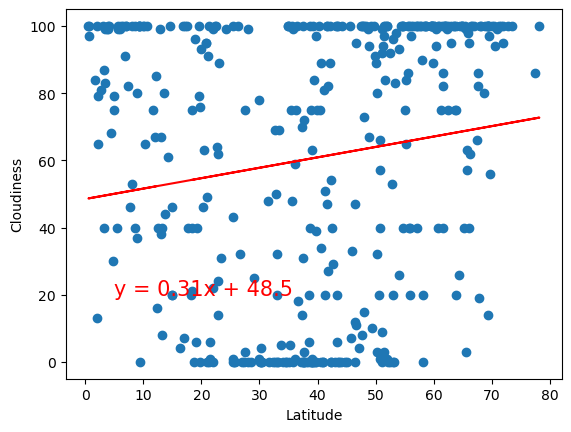

In [49]:
# Northern Hemisphere
line_eq = lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

plt.annotate(line_eq, (5, 20), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


The r-value is: 0.14341322916643243


Text(0, 0.5, 'Cloudiness')

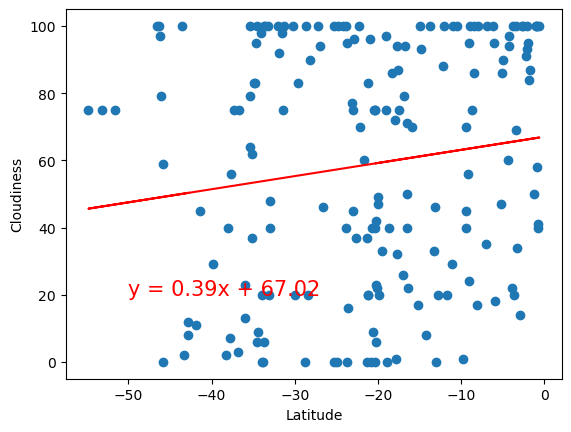

In [50]:
# Southern Hemisphere
line_eq = lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

plt.annotate(line_eq, (-50, 20), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


**Discussion about the linear relationship:** Both the northern and southern hemispheres exhibit a negative slope, indicating that cloudiness decreases as latitude increases. However, it is important to consider other analytical methods to validate this conclusion rather than relying solely on the scatter plot.


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.17434667290903338


Text(0, 0.5, 'Wind Speed')

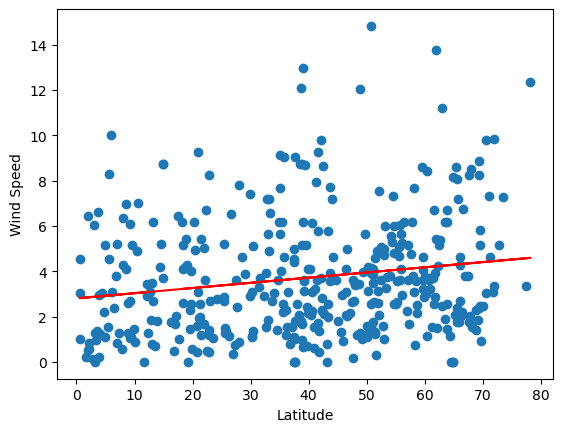

In [51]:
# Northern Hemisphere
line_eq = lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

plt.annotate(line_eq, (40, 25), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

The r-value is: -0.24947753546264592


Text(0, 0.5, 'Wind Speed')

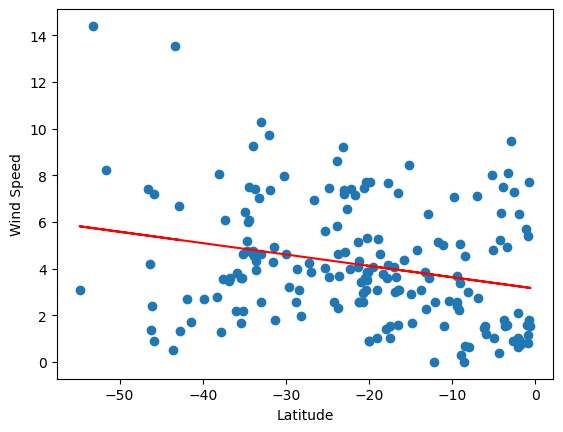

In [52]:
# Southern Hemisphere
line_eq = lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

plt.annotate(line_eq, (-50, 30), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")


**Discussion about the linear relationship:** Wind speeds in the northern hemisphere are highest near the equator and decrease as latitude increases towards the poles. In the southern hemisphere, wind speeds are highest at lower latitudes and also decrease as latitude increases towards the equator.
